# Introduction

## Defining the problem (200-500 words)

Electronic devices have been an integral part of the modern human's social life for more than 2 decades now, and a lot of the connection we have with the world around us uses the electronic device as a medium. With enough adoption, this social connection eventually ends up mimicking the experiences we might otherwise have experienced in person. While browsing the newpaper we might see an advertisement for a new money making opportunity when you buy property in another country, subsequently, we could receive the same advertisement in an SMS or an email. 

With this almost instant connection, advertisers are able to mass send their advertisements to many different users without much overhead and without needing to know the recipient beforehand. Such a ecosystem can lead to unethical and wanton misuse of the platform so it is important to protect the user. This is also known as spam.

If a user cannot parse through every single message individually to sieve out the ones he/she needs, a system has to be in place for him or her to do that. Making a model that is able to do this based on differences in grammar, vocabulary and other syntactical clues when compared to other non-spam messages (ham) would help with this problem. The problem of detecting spam messages is one of a type II error where having a few spam messages being failed to be picked out has favourable outcomes than the having non spam messages being deleted as they contain content that the user wants to see.

Another factor to consider is that even within the english language there isn't one type of spam and ham language and that there is often other factors that determine the content, context, grammar, vocabulary etc. This makes trying to train a native model difficult, and I should leverage on other resources. This dataset contains 3375 Ham SMS out of 5574 that are from the NUS SMS Corpus (NSC) which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. Being Singaporean I am able to tell that a lot of these messages are written in a local creole, Singlish.

A creole is a stable natural language that combines a base language together with elements of their native languages in order to form an new language with it's own unique grammar, vocabulary that can often become unintelligible to the speakers of the separate languages. 

This poses a problem for training language models as these languages are often without regulatory boards, dictionaries and any orthodoxy efforts meaning that the language is constantly subject to change. This issue affects all types of NLP related problems and is worth giving resources to solve.

To recap:
1. <b>Binary Text Classification Issue of Spam vs Ham</b>
2. <b>Creole language Singlish will affect the model accuracy</b>


## Objectives (200-500 words)

<b> My main objective with this project is to develop/find a model that is able to sort out Spam vs Ham messages from the contents of the message with a high degree of accuracy.</b>

To do this I need to be able to:
1. properly carry out text preprocessing on the data to make it as clean as possible to ensure the best and more reproducible results
2. have a comparison baseline model which uses little resources and is easy to code
3. use a pretrained LLM on the dataset
4. evaluate the results using quantitative analysis and metrics
5. explain the possible results and draw conclusions on the effectiveness of the solutions

I hope that with my analysis I will be able to contribute slightly in reducing spam mail and help towards eliminating this type of advertisement entirely as it is very much unsustainable and produces a bad online environment. This type of advertisement when scaled leaves a high carbon footprint, along with further clogging up our brain's limited short term memory, which is constantly being overloaded by modern technologies.

<b> The secondary objective with this project is to test the effectiveness of modern LLMs in analysing the Singaporean creole language, Singlish. </b>

As mentioned above, Singlish does not have much official resources and can't be learnt unless you are born and raised in the country. However, with modern communication technology, Singaporeans have started to use the latin alphabet as a script for vocabulary unique to Singlish. These words are not standardised but using LLMs I am interested in adding one more piece to the puzzle.


## Dataset (200-500 words)

This dataset is taken from open source site Kaggle at this link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset titled SMS Spam Collection Dataset uploaded UCI Machine Learning.

This dataset is a collection of 5,574 unique SMS messages that have been compiled by the owner for SMS Spam research. The data is split into 2 separate columns: one indicating if it's spam or ham (legitimate messages) and the other the body of the SMS.

<b>Dataset History:</b>
1. 425 Spam Messages were manually extracted from the Grumbletext Web site which is a UK forum in which cell phone users make public claims about SMS spam messages. They carefully scanned over hundreds of web pages to make sure that the messages are in fact spam as these spam messages were often not formally reported by the users of the forum. According to them this task was very difficult and time consuming.

2. As mentioned above, a subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore to be added into this dataset.

3. A list of 450 SMS ham messages collected from Caroline Tagg's PhD Thesis. Available at this link: https://etheses.bham.ac.uk/id/eprint/253/1/Tagg09PhD.pdf

4. Lastly they incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: http://www.esp.uem.es/jmgomez/smsspamcorpus/.


<b>Preliminary Observations:</b>

1. This data has academia standards of quality and is good training data (as least within itself).
2. The data is rather imbalanced with ham:spam ratio being 87:13. I will have to make changes to data sampling for accuracy.
3. The 3375 SMS from the NSC makes up an overwhelming amount of the messages and as mentioned above might affect the data as a considerable amount of the messages will be in Singlish.
4. The results from this dataset might make it hard to explain due to the varying sources of data that might not have a common enough feature that can be explained, though this is a common issue in AI.

## Evaluation Methodology (200-500 words)

The main metrics I will be using are Accuracy, Precision, Recall, F-Score.

-  Accuracy measures the overall prediction correctness of all result type. It is the ratio of correct predictions to total predictions made. Accuracy = (true positive + true negative) / (true positive +true negative + false positive + false negative).

- Precision measures the accuracy of positive predictions. It calculates the proportion of correct positive predictions to all positive predictions. Precision = (true positive) / (true positive + false positive).

- Recall measures the true positive rate. It calculates the proportion of correct positive predictions to all true positives. Recall = (true positive) / (true positive + false negative).

- F-score is the harmonic mean of precision and recall. F-score = 2 * (precision * recall) /(precision + recall).

As mentioned above this problem favours a type II error where a message that is not deleted by a spam filter rather than one that contains a legitimate message but is deleted. One of the important things to note is how it performs in its individual lables since the data is imbalanced. In the case of filtering out spam, we generally would care more about higher accuracy &  precision rate and less so the recall rate.

# Implementation

In [1]:
#import dependencies

# Math
import numpy as np
# Data visualisations
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
#Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight

from collections import defaultdict

# Text analysis
import re
import string
import emoji
import nltk
# # load to if need to update
# nltk.download('all')
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Evaluation
from sklearn.metrics import balanced_accuracy_score,confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

# Model
from sklearn.naive_bayes import MultinomialNB

# DL tools
import datasets
from datasets import Dataset, DatasetDict
import torch
from torch.utils.data import DataLoader
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
from transformers import AdamW
from transformers.optimization import get_linear_schedule_with_warmup 
from transformers.trainer_utils import set_seed
from accelerate import Accelerator, DistributedType
from tqdm.auto import tqdm
import evaluate

from accelerate import notebook_launcher

# Warnings
import warnings
warnings.filterwarnings('ignore')



## Preprocessing

### Load Dataset

In [2]:
df = pd.read_csv('spam_utf8.csv')

### Data Inspection - Surface

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<b> Observations </b>
1. The data in columns 2,3,4 are mostly blank. Upon inspection seem like insignificant data, can be removed.
2. Remove duplicates that might be in v1 and v2.
3. Remove missing values.

### Clean Dataset - Dataframe

In [5]:
# dropping un necessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# renaming the columns
df.rename(columns={'v1':'labels','v2':'text'},inplace=True)
df

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# encode labels

le = LabelEncoder()
df['labels'] = le.fit_transform(df['labels'])

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
print(df)

{'ham': 0, 'spam': 1}
      labels                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ã_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [8]:
# missing values
df.isnull().sum()

labels    0
text      0
dtype: int64

In [9]:
# duplicated values
df['text'].duplicated().sum()

403

In [10]:
# dropping duplicates value
print("before:",df.shape)
df.drop_duplicates(inplace=True)
print("after:",df.shape)

before: (5572, 2)
after: (5169, 2)


### Data Inspection - Deep Dive

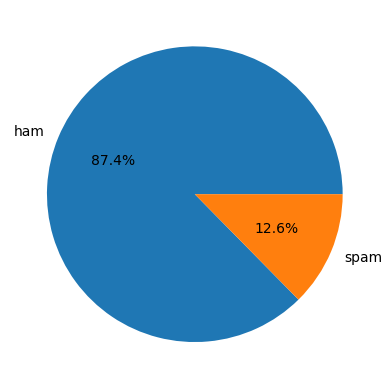

In [11]:
# Compare Data Balance
fig, ax = plt.subplots()
ax.pie(df["labels"].value_counts(),labels=['ham','spam'], autopct='%1.1f%%')
plt.show()

<b> Observations </b>
1. We see highly unbalanced data. Keep this in mind during the train_test_split. 

In [12]:
# Feature engineering

#num of characters
df['num_characters'] = df['text'].apply(len)
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df

,labels,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ã_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [13]:
# describe features
print('overall:\n', df[['num_characters','num_words','num_sentences']].describe(),'\n')
print('spam:\n', df[df['labels'] == 1 ][['num_characters','num_words','num_sentences']].describe(),'\n')
print('ham:\n', df[df['labels'] == 0 ][['num_characters','num_words','num_sentences']].describe())

overall:
        num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.474560       1.948152
std         58.236293    13.340873       1.363792
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      28.000000 

spam:
        num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.681470       2.975498
std         30.137753    7.011794       1.487993
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       8.000000 

ham:
        num_characters    num_words  num_sentences
count     4516.000000  4516.0000

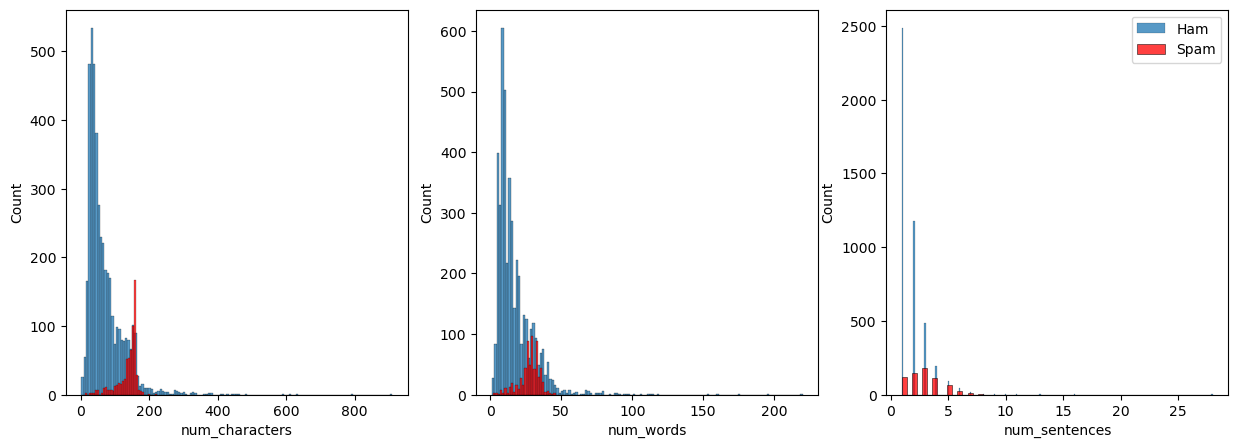

In [14]:
# visualise features

fig, axs = plt.subplots(1, 3, figsize=(15,5))

#characters
sns.histplot(df[df['labels'] == 0 ]['num_characters'], ax = axs[0], label='Ham')
sns.histplot(df[df['labels'] == 1 ]['num_characters'], ax = axs[0],label='Spam', color='red')
#words
sns.histplot(df[df['labels'] == 0 ]['num_words'], ax = axs[1],label='Ham')
sns.histplot(df[df['labels'] == 1 ]['num_words'], ax = axs[1],label='Spam', color='red')
#sentences
sns.histplot(df[df['labels'] == 0 ]['num_sentences'], ax = axs[2],label='Ham')
sns.histplot(df[df['labels'] == 1 ]['num_sentences'], ax = axs[2],label='Spam', color='red')

plt.legend()
plt.show()

<b> Observations </b>
1. Spam messages has a lot more characters but there is considerable overlap with ham messages as well.
2. With more characters there will also be more words used.
3. Num_sentences does not correlate as nicely as num_characters and num_words do.

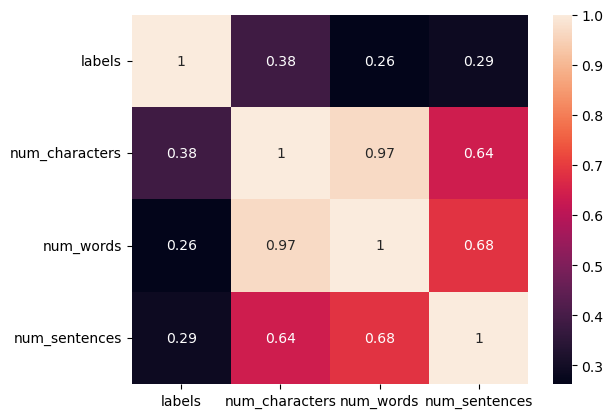

In [15]:
# correlation between features

sns.heatmap(df.corr(), annot = True)

plt.show()

<b> Observations </b>

We have a better picture here where we see num_sentences and num_words being correlated to Ham (0) label. We also see that like the above chart num_words being highly correlated with num_characters at 0.97. However despite this num_characters is slightly less correlated to Ham label despite sharing similarities with num_words.

### Clean data - text preprocessing

1. Lowercase
2. Tokenization
3. Stopwords
4. Special Characters
5. Stemming / Lemmatization

In [16]:
# text preprocessing pipeline function

def tp_pipeline(text):
    
    #lowercase
    lowercase_text = text.lower()
    
    #tokenize
    tokenized_text = nltk.word_tokenize(lowercase_text)
    
    
    #remove stopwords & punctuation
    stopwords_en = set(stopwords.words('english'))
    
    for i in range(len(tokenized_text)):
        if tokenized_text[i] in stopwords_en:
            tokenized_text[i].replace(tokenized_text[i], "")
        tokenized_text[i] = tokenized_text[i].translate(str.maketrans('', '', string.punctuation))
    

    #lemmatization 
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in tokenized_text])
    
            
    return lemmatized_text
    

In [17]:
df['transformed_text'] = df['text'].apply(tp_pipeline)
df

,labels,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only i...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do nt think he go to usf he life around...
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,this is the 2nd time we have tried 2 contact u...
5568,0,Will Ã_ b going to esplanade fr home?,37,9,1,will ã b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity wa in mood for that so any other sugg...
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,the guy did some bitching but i acted like i d...


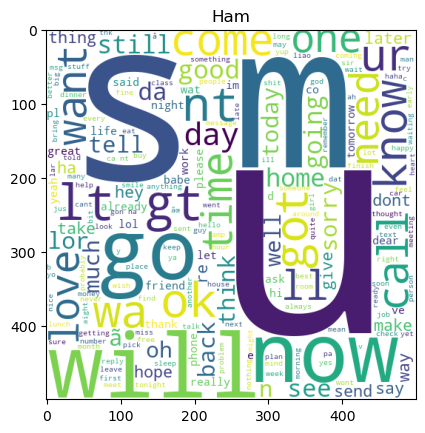

In [64]:
# wordcloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

# ham wc
ham_wc = wc.generate(df[df['labels'] == 0]['transformed_text'].str.cat(sep=" "))

plt.imshow(ham_wc)
plt.title('Ham')
plt.show()



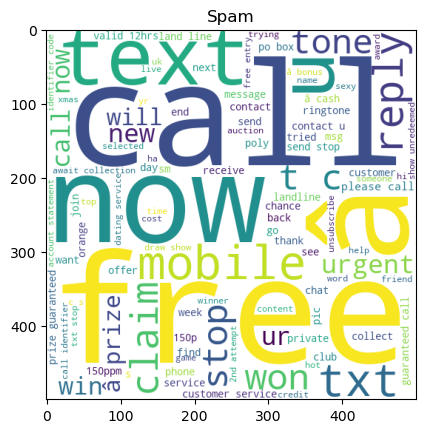

In [65]:
# spam wc
spam_wc= wc.generate(df[df['labels'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.title('Spam')
plt.show()


<b> Observations: </b>

Most of these words on both wordclouds are commonly used phrases but words that show up on the spam wordcloud like 'free', 'call','text' and an accented 'a' stand out. You can see how these might be telling signs of Spam messages.

### Feature Extraction

In [19]:
# initialise model variables
SEED = 42
BATCH_SIZE = 32
EPOCHS = 5

In [20]:
df_new = df[['labels','transformed_text']]
df_new

,labels,transformed_text
0,0,go until jurong point crazy available only i...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i do nt think he go to usf he life around...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ã b going to esplanade fr home
5569,0,pity wa in mood for that so any other sugg...
5570,0,the guy did some bitching but i acted like i d...


In [21]:
# train test split
TEST_SIZE=0.3

text_train, text_test, y_train, y_test = train_test_split(df_new['transformed_text'], df_new['labels'], test_size=TEST_SIZE, 
                                                          stratify = df['labels'], 
                                                          shuffle = True, random_state=SEED)

# MAX_FEATURES = 25
NGRAM = 2
MAX_DF = 0.9
MIN_DF = 5

# vectorize
vectorizer = TfidfVectorizer(ngram_range = (1,NGRAM), max_df = MAX_DF, 
                             min_df = MIN_DF , sublinear_tf = True, use_idf = True)
vectorizer.fit(text_train)
X_train = vectorizer.transform(text_train).toarray()
X_test = vectorizer.transform(text_test).toarray()

In [22]:
# # MAX_FEATURES = 25
# NGRAM = 2
# MAX_DF = 0.9
# MIN_DF = 5

# # vectorize
# vectorizer = TfidfVectorizer(ngram_range = (1,NGRAM), max_df = MAX_DF, 
#                              min_df = MIN_DF , sublinear_tf = True, use_idf = True)
# vectorizer.fit(train_df)
# X_train = vectorizer.transform(train_df).toarray()
# X_test = vectorizer.transform(test_df).toarray()

In [23]:
print(text_train)

1735                 why tired what special there you had
31      yeah he got in at 2 and wa v apologetic  n had...
4134    no need to say anything to me  i know i am an ...
1230    i want to send something that can sell fast   ...
455        si si  i think ill go make those oreo truffle 
                              ...                        
5212                          kkhow is your business now 
1911    lol grr my mom is taking forever with my presc...
4014    you will be receiving this week s triple echo ...
1191    come to my home for one last time i wont do an...
3742    nah  wednesday  when should i bring the mini c...
Name: transformed_text, Length: 3618, dtype: object


## Baseline Model

<b>Description:</b>

Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing tasks  like predicting the tag of a text such as an email. By calculating the probability of something being of a certain tag (in this case 0 or 1), it returns the results of the tag with the highest probabilty.

This model is built on the Bayes Theorem that calculates the probability of an event occurring based on the prior knowledge of conditions related to an event. 
The formula goes: P(A|B) = P(A) * P(B|A)/P(B) where, 
P(B) = probability of B, 
P(A) = probability of A,
P(B|A) = occurrence of predictor B given class A probability

This is a simple and popular model used in text classification tasks. I chose this model because of it's simplicity to code (see below) and also its low computing overhead despite it being an effective algorithm.

In [24]:
base_model = MultinomialNB()

base_model.fit(X_train,y_train)
base_y_pred = base_model.predict(X_test)
print("Baseline Results:")
print("Accuracy:", balanced_accuracy_score(y_test,base_y_pred))
baseline_class = classification_report(y_test, base_y_pred) 
baseline_conf = confusion_matrix(y_test, base_y_pred)
print(baseline_class)

Baseline Results:
Accuracy: 0.8691599518035997
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1355
           1       0.99      0.74      0.85       196

    accuracy                           0.97      1551
   macro avg       0.98      0.87      0.91      1551
weighted avg       0.97      0.97      0.96      1551



## DL Model

### DL Preprocessing

In [25]:
# split the data into train, test and validation sets
train_df, test_df = train_test_split(df_new, test_size=0.1, random_state=SEED, stratify=df_new.labels.values)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=SEED, stratify=train_df.labels.values)

# create dataset
dataset_dict = {
    "train": Dataset.from_pandas(train_df),
    "validation": Dataset.from_pandas(val_df),
    "test": Dataset.from_pandas(test_df),
}

dataset = DatasetDict(dataset_dict)
dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'transformed_text', '__index_level_0__'],
        num_rows: 3721
    })
    validation: Dataset({
        features: ['labels', 'transformed_text', '__index_level_0__'],
        num_rows: 931
    })
    test: Dataset({
        features: ['labels', 'transformed_text', '__index_level_0__'],
        num_rows: 517
    })
})

In [26]:
def tokenize_function(dataset):
    output = tokenizer(dataset["transformed_text"], truncation=True, padding="max_length", max_length=256)
    return output

### Distilbert Model

<b> Description: </b>

Distilbert is a more streamlined version of the BERT (Bidirectional Encoder Representations) LLM where it has lesser parameters taken, runs 60% faster and still preserves 95% of BERT's performance. 

To quote their website, "To leverage the inductive biases learned by larger models during pretraining, we introduce a triple loss combining language modeling, distillation and cosine-distance losses." 

I chose this model because of how it's base model was trained on a large corpus comprising the Toronto Book Corpus and Wikipedia, which makes it incredibly generic information and I wanted to see how it would do in a text classification task with Singlish in it.

In [27]:
# using pretrained tokenizer for distilbert
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased", use_fast=True)

tokenized_dataset = dataset.map(tokenize_function, batched=True,
                                 remove_columns=["transformed_text", "__index_level_0__"])

tokenized_dataset.set_format("torch")
tokenized_dataset

Map:   0%|          | 0/3721 [00:00<?, ? examples/s]

Map:   0%|          | 0/931 [00:00<?, ? examples/s]

Map:   0%|          | 0/517 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 3721
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 931
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 517
    })
})

In [28]:
def create_dataloader():
    train_dataloader = DataLoader(tokenized_dataset["train"], shuffle=True, batch_size=BATCH_SIZE)
    val_dataloader = DataLoader(tokenized_dataset["validation"], shuffle=False, batch_size=BATCH_SIZE)
    return train_dataloader, val_dataloader

In [29]:
# initialise empty list to store the metrics
class_rs = []
conf_mats = []

# model name
model_name = "distilbert-base-cased"

In [30]:
def training_function():
    accelerator = Accelerator()
    set_seed(SEED)
    
    # initialise evaluation metrics
    accuracy_metric = evaluate.load("accuracy")
    precision_metric = evaluate.load("precision")
    recall_metric = evaluate.load("recall")

    if accelerator.is_main_process:
        datasets.utils.logging.set_verbosity_warning()
        transformers.utils.logging.set_verbosity_info()
    else:
        datasets.utils.logging.set_verbosity_error()
        transformers.utils.logging.set_verbosity_error()
    
    train_dataloader, val_dataloader = create_dataloader()
    
    # call pretrained distilbert model
    model =  AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
    optimizer = torch.optim.AdamW(params=model.parameters(), eps=1e-8, lr=3e-5)
    
    model, optimizer, train_dataloader, val_dataloader = accelerator.prepare(model, optimizer,
                                                                             train_dataloader, val_dataloader)
    
    lr_scheduler = get_linear_schedule_with_warmup(optimizer=optimizer, num_warmup_steps=10,
                                                   num_training_steps=len(train_dataloader) * EPOCHS)
    
    # print progress bar
    progress_bar = tqdm(range(EPOCHS * len(train_dataloader)), disable=not accelerator.is_main_process)

    # train the model for each epoch
    for epoch in range(EPOCHS):
        model.train()
        for step, batch in enumerate(train_dataloader):
            outputs = model(**batch)
            loss = outputs.loss
            accelerator.backward(loss)
            
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()
            progress_bar.update(1)

        model.eval()
        
        # initialise empty lists to store the predictions and labels
        preds = []
        labels = []
        
        for step, batch in enumerate(val_dataloader):
            with torch.no_grad():
                outputs = model(**batch)
            predictions = outputs.logits.argmax(dim=-1).cpu()

            # store predictions and labels
            preds.append(accelerator.gather(predictions))
            labels.append(accelerator.gather(batch["labels"]).cpu())

        # concatenate predictions and labels
        preds = torch.cat(preds)[:len(tokenized_dataset["validation"])]
        labels = torch.cat(labels)[:len(tokenized_dataset["validation"])]

        # compute and print evaluation metrics for each epoch
        accuracy = accuracy_metric.compute(references=labels, predictions=preds)
        precision = precision_metric.compute(references=labels, predictions=preds, average="weighted")
        recall = recall_metric.compute(references=labels, predictions=preds, average="weighted")
        accelerator.print(f"epoch {epoch}:", accuracy, precision, recall)
        
        # create classification report
        class_r = classification_report(labels, preds)
        class_rs.append(class_r)
        
        # create conf_mat
        conf_mat = confusion_matrix(labels, preds)
        conf_mats.append(conf_mat)


In [31]:
notebook_launcher(training_function, args=(), num_processes=1)

Launching training on one GPU.


loading configuration file config.json from cache at C:\Users\Admin/.cache\huggingface\hub\models--distilbert-base-cased\snapshots\4dc145c5bd4fdb672dcded7fdc1efd6c2bc55992\config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-cased",
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.31.0",
  "vocab_size": 28996
}

loading weights file pytorch_model.bin from cache at C:\Users\Admin/.cache\huggingface\hub\models--distilbert-base-cased\snapshots\4dc145c5b

  0%|          | 0/585 [00:00<?, ?it/s]

epoch 0: {'accuracy': 0.9785177228786252} {'precision': 0.9785177228786252} {'recall': 0.9785177228786252}
epoch 1: {'accuracy': 0.9785177228786252} {'precision': 0.9785177228786252} {'recall': 0.9785177228786252}
epoch 2: {'accuracy': 0.9838882921589689} {'precision': 0.9837633517070843} {'recall': 0.9838882921589689}
epoch 3: {'accuracy': 0.9828141783029001} {'precision': 0.9826130278600742} {'recall': 0.9828141783029001}
epoch 4: {'accuracy': 0.9838882921589689} {'precision': 0.9837163112312818} {'recall': 0.9838882921589689}


In [33]:
# print results of last epoch
Dbert_class = class_rs[4]
Dber_conf = conf_mats[4]
print(f'Distilbert Results: \n {Dbert_class}')

Distilbert Results: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       813
           1       0.96      0.92      0.94       118

    accuracy                           0.98       931
   macro avg       0.97      0.95      0.96       931
weighted avg       0.98      0.98      0.98       931



### Singlish Model

<b> Description: </b>

Singbert-lite is the lite-version of the Singbert LLM, which was initialized from Albert base v2, with pre-training finetuned on singlish data. The corpus this was trained on was collected from subreddits- r/singapore and r/malaysia, and forums such as hardwarezone, making it the perfect candidate to test on our dataset.

This is to meet the secondary objectives of my problem statement.

In [34]:
# initialise empty list to store the metrics
class_rs = []
conf_mats = []

# model name
model_name = 'zanelim/singbert-lite-sg'

# launch new model
notebook_launcher(training_function, args=(), num_processes=1)

Launching training on one GPU.


loading configuration file config.json from cache at C:\Users\Admin/.cache\huggingface\hub\models--zanelim--singbert-lite-sg\snapshots\74e501f6729ad50522c3d5f4a5793b770ab21f30\config.json
Model config AlbertConfig {
  "_name_or_path": "zanelim/singbert-lite-sg",
  "architectures": [
    "AlbertForPreTraining"
  ],
  "attention_probs_dropout_prob": 0,
  "bos_token_id": 2,
  "classifier_dropout_prob": 0.1,
  "down_scale_factor": 1,
  "embedding_size": 128,
  "eos_token_id": 3,
  "gap_size": 0,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "inner_group_num": 1,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "albert",
  "net_structure_type": 0,
  "num_attention_heads": 12,
  "num_hidden_groups": 1,
  "num_hidden_layers": 1

  0%|          | 0/585 [00:00<?, ?it/s]

epoch 0: {'accuracy': 0.9441460794844253} {'precision': 0.9459571733237263} {'recall': 0.9441460794844253}
epoch 1: {'accuracy': 0.9709989258861439} {'precision': 0.9707219157685958} {'recall': 0.9709989258861439}
epoch 2: {'accuracy': 0.9752953813104189} {'precision': 0.9748910250010562} {'recall': 0.9752953813104189}
epoch 3: {'accuracy': 0.9720730397422127} {'precision': 0.9715123214698398} {'recall': 0.9720730397422127}
epoch 4: {'accuracy': 0.9785177228786252} {'precision': 0.9781955481899619} {'recall': 0.9785177228786252}


In [36]:
# save results of last epoch
Sbert_class = class_rs[4]
Sbert_conf = conf_mats[4]

In [37]:
# compare all results
print(f'Base Results: \n {baseline_class}')
print(f'Dbert Results: \n {Dbert_class}')
print(f'Singbert Results: \n {Sbert_class}')

Base Results: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1355
           1       0.99      0.74      0.85       196

    accuracy                           0.97      1551
   macro avg       0.98      0.87      0.91      1551
weighted avg       0.97      0.97      0.96      1551

Dbert Results: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       813
           1       0.96      0.92      0.94       118

    accuracy                           0.98       931
   macro avg       0.97      0.95      0.96       931
weighted avg       0.98      0.98      0.98       931

Singbert Results: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       813
           1       0.95      0.88      0.91       118

    accuracy                           0.98       931
   macro avg       0.96      0.94      0.95       931
weighted avg       0.

Baseline Confusion Matrix: 


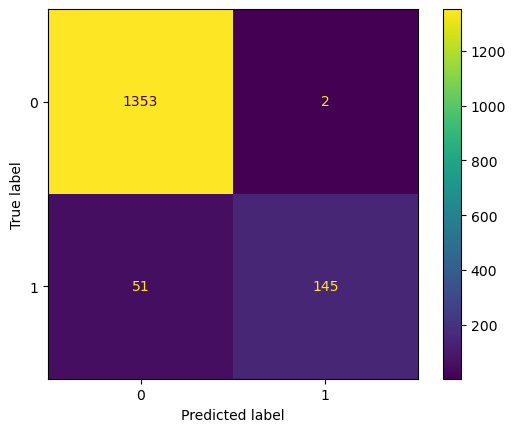

In [47]:
print("Baseline Confusion Matrix: ")
ConfusionMatrixDisplay(baseline_conf).plot()


Distilbert Confusion Matrix: 


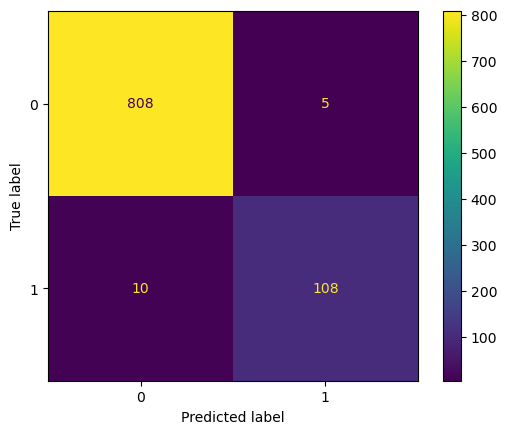

In [49]:
print("Distilbert Confusion Matrix: ")
ConfusionMatrixDisplay(Dber_conf).plot()

Singbert Confusion Matrix: 


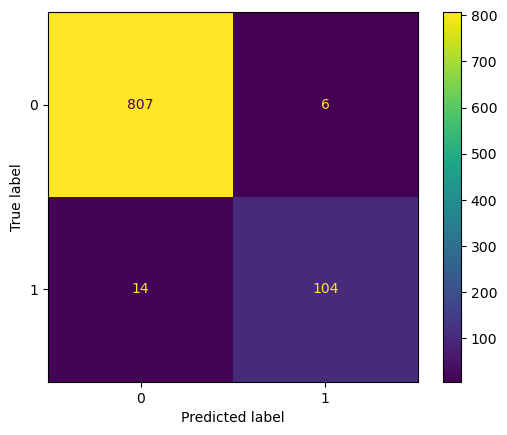

In [50]:
print("Singbert Confusion Matrix: ")
ConfusionMatrixDisplay(Sbert_conf).plot()

# Conclusion

## Evaluation (100-300 words)

<b>Baseline Results:</b>
               
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1355
           1       0.99      0.74      0.85       196
    accuracy                           0.97      1551
           
The accuracy score for this baseline was already very high and the precision for spam detection was equally as good. This sets a high benchmark but I chose to keep this as it can truly test the effectiveness of the other LLMs I am going to use.

<b>Distilbert Results:</b>

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       813
           1       0.96      0.92      0.94       118
    accuracy                           0.98       931

We can see that the overall accuracy for this model actually improved despite the fact that there was less data to be fitted to and also that precision for Ham detection went up whereas precision for Spam detection went down. Recall value for Spam detection also goes up significantly. I think this is because the difference in depth of the model as despite having less data to support training the LLM to fit to. Being more generalised to take on the different types of task require a large corpus of training data and this demonstrates its benefits.

<b>Sbert Results:</b>
           
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       813
           1       0.95      0.88      0.91       118

    accuracy                           0.98       931
    
The Sbert and Distilbert didn't yield too different of results despite Sbert being trained on Singlish. I think this is because of the main classification task where Spam detectors and not dealing with the nuances of the messages. Spam language might follow a dsicernible pattern even in the Singaporean context making a Sbert not add any value in this scenario.


<b>Confusion Matrix:</b>

I mentioned that this problem favours a type II error and the baseline model only produced 2 FPs as compared to the 5 & 6 of the Distilbert and Sbert respectively. The baseline model lacking a validation set was had to predict more data and still showed better perfomance as compared to the LLMs.

The LLMs did show lesser FNs in general and better performance in that regard.

## Summary & Conclusions (200-400 words)

Overall, I would say that all 3 models can do a decent job in filtering unseen Spam data & has its pros and cons. The baseline model has the least FPs and in that regard will most likely not filter out legitimate messages but fail in its ability to filter out all of the Spam. This can be problematic due to this being the main objective, on a large enough scale and long enough timeline it is very easy to clog a user's inbox. I propose that the model performs this way because tf-idf considers overall document weightage and naive bayes computes the probability meaning that the high frequency terms like "free", "call" that show up in some Spam  text can be removed but these are only the low hanging fruit as it probably cannot differentiate a lot of the common Ham words like 'time', 'want' which will also be in most text written in english.

Contrarily, the LLM models lose more information but catch more Spams. I attribute this to the generalised data that they are trained on allowing for context. That along with how neural networks are trained allows for more intricate connection between words, this in turn allows greater accuracy on generalised tasks. However, these are blackbox AIs so we can only speculate as to the connections the that neural net is making. 

<b><i>In Conclusion:</i></b>

<b>Final Suggestions: </b>
I think that if you have the resources to run a LLM, you should as it would be a safe bet for most of your future text classification tasks. I had to change multiple LLMs in order to find one that would not hit the memory limit of my GPU. I also could only run a limited batch size with only 5 epochs as a result of this limit.

As for a regular ML model, I only recommend using to automate for text classification tasks that are easy as the results will be affected when more context is needed. 

<b>Comparison to prior work - originality, ambition and novelty </b>
I believe my work to be another piece in the puzzle when it comes to NLP. It is unique in that it tests for the nuances between ML and DL models and looks at the results from not only a numbers standpoint but really what they mean but the code is by no means special and that is the point. I believe what I am doing here is meant to be easily copied with low barriers of entry to benefit the field as a whole.

<b>Contributions</b>
This solution has shown that high levels of accuracy using LLMs can be achieved with mid-tier resources via proper preprocessing and planning. What I could have done was further process the text to reduce the noise & given the time I would be able to look for more models produce a better result to share with the rest of the community. Text classification of a simple task is not going to move the needle but it is what I do to keep my process clean that I think will help people the most.


<b>Reproducibility</b>
This code is written in pytorch, python and on a jupyter notebook, all of which are easily accessible. This code can be written in R, or instead of pytorch use tensorflow and keras instead. Instead of a jupyter notebook you can use spyder, visual studio code or any major IDE. This can also be written in non-cell based notebooks. It is very versatile and can easily be done anywhere.

I think this project can serve as a basis for low level automation which is very in-demand amongst companies. Being able to offload menial jobs will improve work efficiency. 